<a href="https://colab.research.google.com/github/vit050587/Data-analysis/blob/master/analytics_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Урок 1

## Задание 1

Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (eta) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [121]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [122]:
X.shape

(2, 10)

In [123]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
y

[45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [124]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

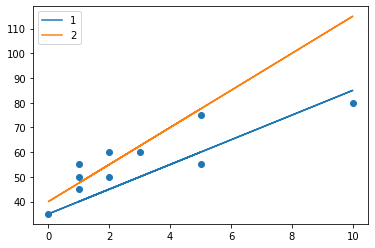

In [125]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [126]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [127]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [128]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [129]:
X.shape

(2, 10)

In [130]:
X.T.shape

(10, 2)

In [131]:
all(X @ y == np.dot(X,y))

True

In [132]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [133]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

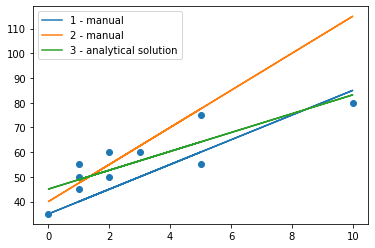

In [134]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [135]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [136]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [137]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [138]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

In [139]:
calc_mse(y, y_pred1), calc_mse(y, y_pred2), calc_mse(y, y_pred3)

(97.5, 188.75, 43.96875000000001)

Градиентный спуск

In [140]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [141]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [142]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

**ДЗ**

In [143]:
n = X.shape[1]
alpha = 1e-02
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [144]:
n = X.shape[1]
alpha = 0.04
iterations = 1000
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')
for i in range(iterations):
    y_pred = W @ X
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1 / n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 5.32 15.58], MSE = 3047.75
Iteration #100: W_new = [44.07620927  3.99134862], MSE = 44.46
Iteration #200: W_new = [45.0385066   3.81685083], MSE = 43.97
Iteration #300: W_new = [45.06191631  3.81260584], MSE = 43.97
Iteration #400: W_new = [45.0624858   3.81250257], MSE = 43.97
Iteration #500: W_new = [45.06249965  3.81250006], MSE = 43.97
Iteration #600: W_new = [45.06249999  3.8125    ], MSE = 43.97
Iteration #700: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #800: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #900: W_new = [45.0625  3.8125], MSE = 43.97


In [145]:
def grad_desc(X, y, alpha=1e-02, verbose=False, tol=0.0):
    n = X.shape[1]
    W = np.array([1, 0.5])         # стартовые веса
    min_err = float('inf')         # минимальная ошибка
    n_iter = 0                     # счетчик итераций
    stop_chek = True               # остановка итераций
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:    # сравнение ошибки
            min_err = err
        else:                      
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [146]:
W_1, mse_1 = grad_desc(X, y, alpha=0.05, verbose=True)
W_1, mse_1

100 [44.66702658  3.88421301] 44.049619635762255
200 [45.05878313  3.813174  ] 43.968757143412105
300 [45.06246507  3.81250633] 43.96875000063098
Стоп! Количество итераций: 386, W: [45.06249934  3.81250012], MSE: 43.96875000000021


(array([45.06249937,  3.81250011]), 43.96875000000021)

**Попробовал визуализацию**

In [147]:
iterations = 300
alpha_list = []
mse_list = []

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]:
    alpha_list.append(alpha)
    errs = []
    W = np.array([1, 0.05])
    for t in range(iterations):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errs.append(err)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    mse_list.append(errs)

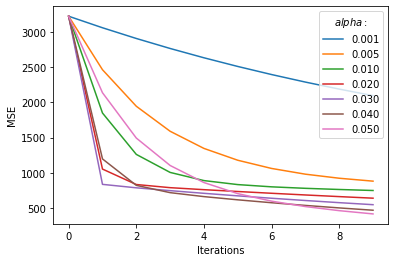

In [148]:
lim = 10
for i in range(len(alpha_list)):
    plt.plot(range(lim), mse_list[i][:lim], label = '{:.3f}'.format(alpha_list[i]))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(title=r'$alpha:$')

## Задание 2*

В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [152]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(iterations):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))        
    W_pred = W
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33


## Задание 3*

Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере diff=1e-6, а значение eta=1e-2?

In [157]:
diff = 1e-6
eta = 1e-2
W = np.array([1, 0.5])
err_pred = np.inf
i = 0
 
while True:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * np.dot(X, (y_pred - y)))
    i += 1
    if np.abs(err - err_pred) <= diff:
        print('Стоп!', i, W, err)
        break
err_pred = err

KeyboardInterrupt: ignored

# Урок 2

## Задание 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [176]:
X, y, W_default = make_regression(
    n_features=10,
    bias=3.5,
    noise=1.2,
    coef=True,
    random_state=42
)
W_default # Вектор весов данной модели

array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
       70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195])

In [177]:
y_pred_default = X @ W_default # предсказания модели

In [178]:
def calc_mse(y, y_pred):            # MSE
    err = np.mean((y - y_pred) ** 2)
    return err

In [179]:
mse_default = calc_mse(y, y_pred_default)
mse_default

14.867688515340435

In [182]:
def One_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )    # стартовые веса
    min_err = float('inf')               # минимальная ошибка
    n_iter = 0                           # счетчик итераций
    stop_chek = True                     # остановка итераций
    errors = []
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)
        errors.append(err)
        if min_err - err > tol:         # сравнение ошибки
            min_err = err
        else:                      
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False        
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [183]:
W_1, mse_1, score_1 = One_grad_desc(X, y, alpha=0.001, tol=0.00001)

Стоп! Количество итераций: 6782, W: [17.0185618  54.4701536   4.75419964 63.30980695 93.39788214 71.04147529
 86.9857779  10.2364409   3.51111628 70.81234003], MSE: 14.301236127866332


**SGD**

In [184]:
def One_sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # стартовое значение весов
    n_batch = n // batch_size          # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')             # начальное значение ошибки модели - бесконечность
    n_iter = 0                         # счетчик итераций
    stop_chek = True                   # будем чекать снижение ошибки
    errors = []                        # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [185]:
W_2, mse_2, score_2 = One_sgd(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Стоп! Количество итераций: 5527, W: [17.03692087 54.52010552  4.68552835 63.30896436 93.33031497 71.12780738
 86.89314922 10.13348232  3.53957738 70.69431333], MSE: 10.999077262529052


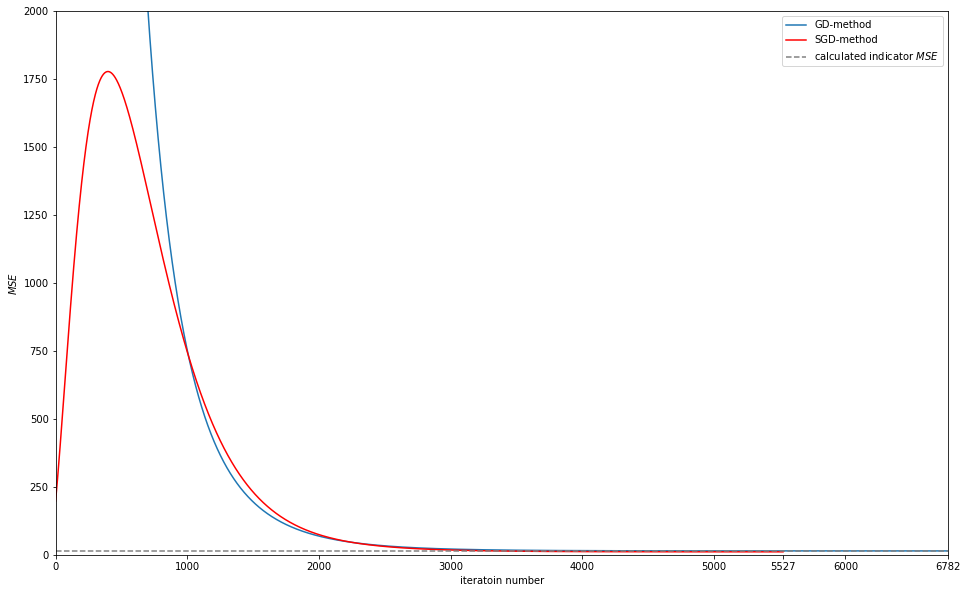

In [186]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_1)-1000))
plt.plot([x for x in range(len(score_1))], score_1, label='GD-method')
plt.plot([x for x in range(len(score_2))], score_2, c='r', label='SGD-method')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

## Задание 2

Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

# Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.
* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

# Урок 3

## Задание 1

 Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

## Задание 2

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

## Задание 3

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

## Задание 4

Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

## Задание 5

Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

## Задание 6

Могла ли модель переобучиться? Почему?

# Урок 4

## Задание 1

В коде из методички реализуйте один или несколько критериев останова: минимальное количество объектов в листе (min_leaf), максимальная глубина дерева, максимальное количество листьев и т.д. Добавьте эти критерии в параметры функции build_tree и проверьте ее работоспособность с помощью визуализации дерева (функция print_tree).

## Задание 2*

Для задачи классификации обучите дерево решений с использованием критериев разбиения Джини и Энтропия. Сравните качество классификации, сделайте выводы.

## Задание 3*

Реализуйте дерево для задачи регрессии. Возьмите за основу дерево, реализованное в методичке, заменив механизм предсказания в листе на взятие среднего значения по выборке, а критерий Джини на дисперсию значений. Проверьте точность предсказания дерева на одной из метрик задачи регрессии.

In [ ]:
# 3 задание
from sklearn import datasets

regression_data, regression_labels = datasets.make_regression(n_samples=100, 
                                                      n_features=1, noise=10,
                                                      random_state=42)
plt.figure(figsize=(6,6))
plt.scatter(regression_data, regression_labels, c='darkorange', edgecolor='black', s=70);